<a href="https://colab.research.google.com/github/albertofernandezvillan/computer-vision-and-deep-learning-course/blob/main/pytorch_1_tensors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" style="padding-right:10px;" src ="https://raw.githubusercontent.com/albertofernandezvillan/computer-vision-and-deep-learning-course/main/assets/university_oviedo_logo.png" width=300 px>

This notebook is from the Course "***Computer vision in the new era of Artificial Intelligence and Deep Learning***", or "*Visión por computador en la nueva era de la Inteligencia Artificial y el Deep Learning*" (ES) from the "Second quarter university extension courses" that the University of Oviedo is offering (05/04/2021 - 16/04/2021)

<[Github Repository](https://github.com/albertofernandezvillan/computer-vision-and-deep-learning-course) | [Course Web Page Information](https://www.uniovi.es/estudios/extension/cursos2c/-/asset_publisher/SEp0PJi4ISGo/content/vision-por-computador-en-la-nueva-era-de-la-inteligencia-artificial-y-el-deep-learning?redirect=%2Festudios%2Fextension%2Fcursos2c)>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/c/c6/PyTorch_logo_black.svg"></center>

# Introduction to PyTorch



[PyTorch](https://pytorch.org/) is a library of scientific computing. It is developed in C ++ and Python, but it is designed to be used in Python.

Basically PyTorch is based on two fundamental pillars:

* The tensors: a data structure similar to the NumPy array but hardware accelerated.
* Automated gradient calculation. This aspect is essential for model optimization. 



# PyTorch initialization

To start you need to import the package. Then you can check which version is installed 

In [114]:
import torch
torch.version.__version__

'1.8.1+cu101'

PyTorch allows the execution of most operations directly on the GPU. Therefore, it is important to check if GPU support is available. If it does not appear that Cuda is available, the runtime type of the notebook must be changed. 

In [115]:
torch.cuda.is_available()

True

In [116]:
torch.cuda.get_device_name(0)

'Tesla P100-PCIE-16GB'

A tensor is nothing more than a set of numbers organized in various dimensions. A tensor can be:

* A scalar: a single number.
* An array: a list of consecutive numbers that can be accessed by an index that indicates the position they occupy.
* A matrix. The same as before but in two dimensions.
* A multidimensional array. The extension of the previous case to n dimensions. 

# Creating a tensor



## Creation from lists

In [117]:
x = [1, 2, 3, 4, 5, 6]
t = torch.tensor(x)
type(t)

torch.Tensor

The reverse process can also be done. 

In [118]:
x = t.tolist()
type(x)

list

A tensor can contain only one number. In that case it can be accessed in the following way.

In [119]:
x = torch.tensor([10])
x.item()

10

## Creation from NumPy

In [120]:
import numpy as np
y = np.array([1,2,3,4,5])
type(y)

numpy.ndarray

In [121]:
t = torch.tensor(y)
t

tensor([1, 2, 3, 4, 5])

Creating a tensor makes a copy of the data. Copyless creation is also possible.

In [122]:
t = torch.from_numpy(y)
type(t)

torch.Tensor

In this case, modifying the original data also modifies the tensor.

In [123]:
y[0]=100
t

tensor([100,   2,   3,   4,   5])

In the opposite direction it is also possible.

In [124]:
y = t.numpy()
type(y)

numpy.ndarray

## Direct creation

There are also many ways to create them directly. Some examples are shown below.

In [125]:
a = torch.ones(5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([1., 1., 1., 1., 1.])
Shape: torch.Size([5])


In [126]:
a = torch.ones(3,3)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
Shape: torch.Size([3, 3])


In [127]:
a = torch.zeros(3,4,5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])
Shape: torch.Size([3, 4, 5])


In [128]:
a = torch.linspace(10,20,5)
print(f'{a}')
print(f'Shape: {a.shape}')

tensor([10.0000, 12.5000, 15.0000, 17.5000, 20.0000])
Shape: torch.Size([5])


# Indexing

The way to access the elements of a tensor is the same as in NumPy. Examples are shown below.

In [129]:
t = torch.tensor([[1, 2, 3], [4, 5, 6]])
t

tensor([[1, 2, 3],
        [4, 5, 6]])

The first item.

In [130]:
t[0,0]

tensor(1)

The last item.

In [131]:
t[-1,-1]

tensor(6)

All items of the first row.

In [132]:
t[0,:]

tensor([1, 2, 3])

All items in the first column.

In [133]:
t[:,0]

tensor([1, 4])

Items in all rows and in the first two columns.

In [134]:
t[:,0:2]

tensor([[1, 2],
        [4, 5]])

# Data types

Generally a tensor contains real numbers. Specifically real numbers represented in floating point with 32 bits. However, there is the possibility of using other types of data.

In [135]:
t = torch.rand(2,3)
t

tensor([[0.3883, 0.8676, 0.5710],
        [0.7772, 0.1261, 0.3996]])

In [136]:
t.dtype

torch.float32

When it is created you can specify the type:


In [137]:
t = torch.ones(10, 2, dtype=torch.int8)
t

tensor([[1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1],
        [1, 1]], dtype=torch.int8)

In [138]:
t.dtype

torch.int8

As can be seen in the [documentation](https://pytorch.org/docs/stable/tensors.html) there are many types of data available

# Operations on tensors

In PyTorch you can perform a large number of operations with tensors. Here are some examples.

In [139]:
t = torch.rand(10)
t

tensor([0.7543, 0.9617, 0.4905, 0.0367, 0.9690, 0.6846, 0.5091, 0.0570, 0.6573,
        0.6316])

Calculation of the sine for each element.

In [140]:
torch.sin(t)

tensor([0.6847, 0.8202, 0.4711, 0.0367, 0.8243, 0.6323, 0.4874, 0.0570, 0.6110,
        0.5905])

It would be equivalent to performing

In [141]:
t.sin()

tensor([0.6847, 0.8202, 0.4711, 0.0367, 0.8243, 0.6323, 0.4874, 0.0570, 0.6110,
        0.5905])

In general, operations can be divided into groups:


* Creation
* Indexing
* Mathematical operations
   * Applied to each item (sin)
   * Reduction (mean)
   * Between tensors
* Sampling
* Serialization
* Parallelism 



For example

In [142]:
t1 = torch.ones(2,2)
t2 = torch.ones(2,2)
t2 = t2*10
t1 + t2

tensor([[11., 11.],
        [11., 11.]])

Which would be equivalent to

In [143]:
torch.add(t1, t2)

tensor([[11., 11.],
        [11., 11.]])

# Reshape

A tensor has a structure organized in dimensions. There are ways to make changes in this organization.

In [144]:
t = torch.ones(4,4)
t[2,2] = 99
t

tensor([[ 1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.],
        [ 1.,  1., 99.,  1.],
        [ 1.,  1.,  1.,  1.]])

In [145]:
t = torch.reshape(t, (2, 8))
t

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 1.,  1., 99.,  1.,  1.,  1.,  1.,  1.]])

In [146]:
t = torch.reshape(t, (2, 2, 4))
t

tensor([[[ 1.,  1.,  1.,  1.],
         [ 1.,  1.,  1.,  1.]],

        [[ 1.,  1., 99.,  1.],
         [ 1.,  1.,  1.,  1.]]])

It can be seen that the data is maintained, only the organization changes.

A quick option to convert to a vector with 1 dimension.

In [147]:
t = t.flatten()
t

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
         1.,  1.])

To add more dimensions

In [148]:
t=torch.unsqueeze(t,0)
print(t)
print(t.shape)
t=torch.unsqueeze(t,0)
print(t)
print(t.shape)

tensor([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
          1.,  1.]])
torch.Size([1, 16])
tensor([[[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
           1.,  1.]]])
torch.Size([1, 1, 16])


To remove dimensiones of size 1

In [149]:
t = t.squeeze()
print(t)
print(t.shape)
?torch.squeeze

tensor([ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 99.,  1.,  1.,  1.,
         1.,  1.])
torch.Size([16])


Transpose rows for columns

In [150]:
t = torch.arange(0,10)
t = torch.reshape(t, (2,5))
print(t)
t = t.t()
print(t)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])
tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


To exchange dimensions

In [151]:
t = torch.arange(0,24).reshape(4,3,2)
print(t)
print(t.shape)
t = t.permute(2,1,0)
print(t)
print(t.shape)

tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]],

        [[18, 19],
         [20, 21],
         [22, 23]]])
torch.Size([4, 3, 2])
tensor([[[ 0,  6, 12, 18],
         [ 2,  8, 14, 20],
         [ 4, 10, 16, 22]],

        [[ 1,  7, 13, 19],
         [ 3,  9, 15, 21],
         [ 5, 11, 17, 23]]])
torch.Size([2, 3, 4])


# Moving tensors to the GPU

By default a tensor is stored in main memory and its operations are performed by the CPU. However, they can be transferred to the GPU to make your operations run faster.

In [152]:
t = torch.tensor([1,2,3])
t.device

device(type='cpu')

In [153]:
t = t.to(device='cuda')
t

tensor([1, 2, 3], device='cuda:0')

Operations are executed transparently.

In [154]:
torch.sin(t)

tensor([0.8415, 0.9093, 0.1411], device='cuda:0')

A tensor can be moved back to the CPU.

In [155]:
t = t.to(device='cpu')
t

tensor([1, 2, 3])

The only restriction that exists is that  tensors must be in the same device when you perform operatations between them.

In [156]:
t1 = torch.tensor([1,1,1], device='cuda')
t2 = torch.tensor([2,2,2], device='cuda')
t1 + t2

tensor([3, 3, 3], device='cuda:0')

In [157]:
t3 = torch.tensor([3,3,3])
# This operation raises an error
# t2 + t3

# Serialization

A tensor can be saved to disk to later retrieve its value.

In [158]:
t = torch.rand(4,4)
t

tensor([[0.3887, 0.5366, 0.6924, 0.2859],
        [0.8173, 0.5593, 0.4713, 0.2678],
        [0.2772, 0.3795, 0.0678, 0.9005],
        [0.1292, 0.5280, 0.8852, 0.2552]])

In [159]:
t[0,0] = -999
torch.save(t, 't.pt')

In [160]:
!ls *.pt

t.pt


In [161]:
t2 = torch.load('t.pt')
t2

tensor([[-9.9900e+02,  5.3658e-01,  6.9244e-01,  2.8593e-01],
        [ 8.1730e-01,  5.5935e-01,  4.7127e-01,  2.6785e-01],
        [ 2.7724e-01,  3.7950e-01,  6.7802e-02,  9.0051e-01],
        [ 1.2924e-01,  5.2802e-01,  8.8519e-01,  2.5515e-01]])

# Graphical representation

The content of a tensor can be graphically represented directly.

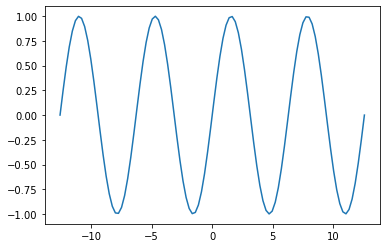

In [162]:
import matplotlib.pyplot as plt
import math
x = torch.linspace(-4*math.pi, 4*math.pi, 100)
y = torch.sin(x)
plt.plot(x,y)

Another example.

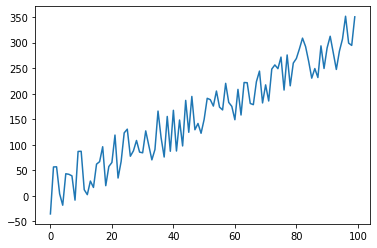

In [163]:
x = torch.tensor(range(100))
y = 3*x + 14
y = y + 100*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

# Images as tensors

Matrices can also be viewed as images.

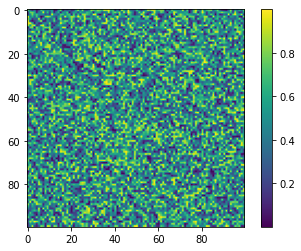

In [164]:
img = torch.rand(100,100)
plt.imshow(img)
plt.colorbar()

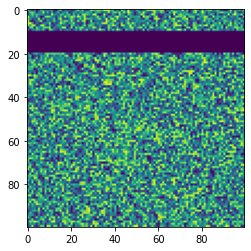

In [165]:
img[10:20,:]=0
plt.imshow(img)

An image can be loaded from OpenCV.

In [166]:
!wget https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
import cv2

image = cv2.imread('Lenna_(test_image).png')


--2021-05-11 17:36:44--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png.1’

Lenna_(test_image). 100%[===================>] 462.73K  --.-KB/s    in 0.09s   

2021-05-11 17:36:44 (5.06 MB/s) - ‘Lenna_(test_image).png.1’ saved [473831/473831]



OpenCV stores the image as BGR, but in order to view it, it must be converted to RGB.

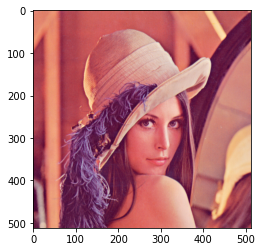

In [167]:
import matplotlib.pyplot as plt
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

El contenido de la imagen es un array de NumPy con organización W x H x C (Width x Height x Channels)

In [168]:
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(512, 512, 3)


In Pytorch  images are organized as C x W x H. Therefore, it would be necessary to do a permutation to convert the format.

In [169]:
image_tensor = torch.tensor(image)
image_tensor = image_tensor.permute(2, 0, 1)
image_tensor.shape

torch.Size([3, 512, 512])

To view a single channel.

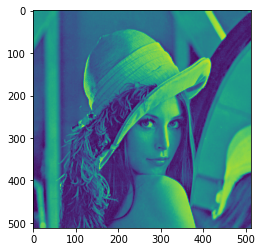

In [170]:
img1 = image_tensor[1,:,:]
img1.shape
plt.imshow(img1)

When a tensor is used to store a set of images, the organization will be N × C × H × W, where N is the number of images.

# Performance with CPU and GPU

To understand the need for Pytorch to add a new data structure (the tensor), a comparison will be made between the performance of the CPU and the GPU.

Two matrices are declared and multiplied (@ operator), both on the CPU and on the GPU.

In [171]:
a = torch.rand(5, 5)
b = torch.rand(5, 5)
r_cpu = a @ b
a = a.to('cuda')
b = b.to('cuda')
r_gpu = a @ b

The difference is negligible.

In [172]:
dif = r_cpu - r_gpu.to('cpu')
dif.sum()

tensor(1.7881e-07)

Now two square matrices of size K are created. In this case, K = 3000.

In [173]:
K = 3000;
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)

In [174]:
import torch.utils.benchmark as benchmark

The time required in the multiplication is measured.

In [175]:
%timeit -n1 -o m1 @ m2

1 loop, best of 5: 603 ms per loop


<TimeitResult : 1 loop, best of 5: 603 ms per loop>

It is stored in a variable.

In [176]:
cpu_time = _
cpu_time.all_runs

[0.6208274749999418,
 0.6222543010001118,
 0.6136395419998735,
 0.61112951899986,
 0.6033018149998952]

In [177]:
num_threads = torch.get_num_threads()

t_cpu = benchmark.Timer(
  stmt='m1 @ m2',
  globals={'m1': m1, 'm2': m2},
  num_threads = num_threads
).blocked_autorange()
t_cpu

m1 @ m2
  663.04 ms
  1 measurement, 1 runs , 1 thread

Now the same operation is executed on the GPU.

In [178]:
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [179]:
%timeit -n1 -o m1 @ m2

The slowest run took 17.35 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 13.6 µs per loop


<TimeitResult : 1 loop, best of 5: 13.6 µs per loop>

In [180]:
gpu_time = _

In [200]:
num_threads = torch.get_num_threads()

t_gpu = benchmark.Timer(
  stmt='m1 @ m2',
  globals={'m1': m1, 'm2': m2},
  num_threads = num_threads
).blocked_autorange()
t_gpu

m1 @ m2
  Median: 12.46 ms
  2 measurements, 10 runs per measurement, 1 thread

The worst time is saved to avoid caching issues.

In [182]:
cpu_time_tensor = torch.tensor(cpu_time.all_runs)
cpu_time_max = cpu_time_tensor.max()
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()

In [183]:
cpu_time_max = t_cpu.median
gpu_time_max = t_gpu.median

The results are represented graphically.

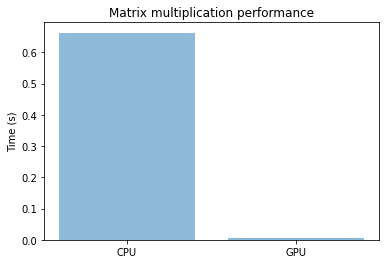

CPU: 0.6630418539998573 seconds
GPU: 0.007066441000006307 seconds


In [184]:
import matplotlib.pyplot as plt
objects = ('CPU', 'GPU')
pos = range(len(objects))
performance = [cpu_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"CPU: {cpu_time_max} seconds")
print(f"GPU: {gpu_time_max} seconds")

# Performance with NumPy and PyTorch

Now the times are going to be compared with respect to NumPy.

In [185]:
import numpy as np
rg = np.random.default_rng(1)
m3 = rg.random((K,K))
m4 = rg.random((K,K))


In [186]:
%timeit -n1 -o m3 @ m4

1 loop, best of 5: 1.28 s per loop


<TimeitResult : 1 loop, best of 5: 1.28 s per loop>

In [187]:
np_time = _

In [188]:
np_time_tensor = torch.tensor(np_time.all_runs)
np_time_max = np_time_tensor.max()
np_time_max

tensor(1.3401)

In [189]:
m1 = torch.from_numpy(m3)
m2 = torch.from_numpy(m4)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [190]:
%timeit -n1 -o m1 @ m2

The slowest run took 249.20 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 12.8 µs per loop


<TimeitResult : 1 loop, best of 5: 12.8 µs per loop>

In [191]:
gpu_time = _
gpu_time.all_runs

[0.0008832400001210772,
 0.0032002089999423333,
 2.4143000018739258e-05,
 1.4040999985809322e-05,
 1.2841999932788895e-05]

In [198]:
num_threads = torch.get_num_threads()

t_gpu = benchmark.Timer(
  stmt='m1 @ m2',
  globals={'m1': m1, 'm2': m2},
  num_threads = num_threads
).blocked_autorange()
t_gpu

m1 @ m2
  Median: 12.43 ms
  2 measurements, 10 runs per measurement, 1 thread

In [193]:
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()

In [194]:
gpu_time_max = t_gpu.median

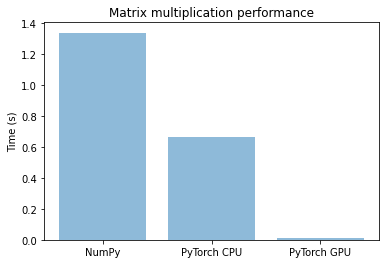

NumPy CPU: 1.3400717973709106 seconds
PyTorch CPU: 0.6630418539998573 seconds
PyTorch GPU: 0.012505394449988216 seconds


In [195]:
objects = ('NumPy', 'PyTorch CPU', 'PyTorch GPU')
pos = range(len(objects))
performance = [np_time_max,cpu_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"NumPy CPU: {np_time_max} seconds")
print(f"PyTorch CPU: {cpu_time_max} seconds")
print(f"PyTorch GPU: {gpu_time_max} seconds")